# Lab 10: Testing Hypotheses

Welcome to Lab 10 !

After such an extensive introduction to programming for data science, we are finally moving into the section of the course where we can apply our new skils to answer real questions.  

In this lab, we'll take a look again at probabilities with decks of cards followed by using testing techniques in the Chapter 11 to test the idea of the therapeutic touch, the idea that some practitioner can feel and massage your human energy field. 

Outline:

     1: Assesing Jades Models
    
     2: Examining the Therapeutic Touch  
    
Run the cells below to get started.

In [7]:
from datascience import *
import pandas as pd
import numpy as np 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Assessing Jade's Models
#### Games with Jade

Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 13 card deck with 4 face cards (A, J, Q, K), and 9 numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10). If we draw cards with replacement 13 times, and if the number of face cards is greater than or equal to 4, we lose.
> 
> Otherwise, Jade wins.

We play the game once and we lose, observing 8 total face cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K), but we do not believe her. We believe that the deck is clearly rigged, with face cards (A, J, Q, K) being more likely than the numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10).

**Question 1:** Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a face card as the first element, and the chance of drawing a numbered card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1. 

In [8]:
deck_model_probabilities = [4/13, 9/13]
deck_model_probabilities = [0.31, 0.69]

**Question 2:** We believe Jade's model is incorrect. In particular, we believe there to be a  larger chance of getting a face card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. 

1. The actual number of face cards we get in 13 draws
2. The distance (absolute value) between the actual number of face cards in 13 draws and the expected number of face cards in 13 draws (4)
3. The expected number of face cards in 13 draws (4)

In [9]:
statistic_choice = [1]
statistic_choice

[1]

**Question 3:** Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the number of face cards in one simulation of drawing a card under the model specified in `model_proportions`. 

In [10]:
def deck_simulation_and_statistic(sample_size, model_proportions):
  return sample_proportions(sample_size, model_proportions)

proportion = deck_simulation_and_statistic(13, deck_model_probabilities)
print(proportion.item(0) * 13)

4.0


**Question 4:** Use your function from above to simulate the drawing of 13 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`. 

In [11]:
repetitions = 5000 
def all_simulations(repetitions, sample_size, deck_model_probabilities):
  all_statistics = []
  for i in range(repetitions):
    sample_proportions = deck_simulation_and_statistic(sample_size, deck_model_probabilities)
    sample_count = sample_proportions.item(0) * sample_size
    all_statistics.append(round(sample_count))
  return all_statistics

deck_statistics = all_simulations(repetitions, 13, deck_model_probabilities)
print(deck_statistics)

[5, 5, 3, 3, 3, 0, 4, 3, 3, 3, 2, 6, 7, 4, 5, 3, 4, 7, 5, 2, 2, 4, 5, 5, 2, 5, 8, 4, 3, 3, 5, 5, 5, 2, 6, 2, 5, 4, 4, 7, 5, 3, 5, 3, 4, 3, 3, 5, 2, 4, 3, 3, 4, 3, 1, 3, 7, 2, 3, 4, 5, 5, 5, 3, 3, 5, 4, 3, 4, 6, 3, 2, 3, 6, 4, 3, 5, 4, 5, 5, 4, 3, 5, 5, 1, 3, 4, 3, 4, 0, 5, 6, 2, 3, 5, 6, 5, 3, 4, 3, 4, 5, 4, 3, 4, 6, 5, 4, 1, 6, 4, 4, 6, 2, 1, 2, 3, 5, 7, 4, 5, 4, 5, 6, 5, 9, 6, 5, 5, 3, 0, 4, 2, 3, 6, 3, 7, 3, 3, 4, 4, 4, 5, 3, 4, 8, 4, 3, 5, 1, 4, 4, 5, 5, 2, 4, 6, 4, 4, 3, 3, 3, 1, 6, 6, 2, 1, 3, 0, 4, 1, 4, 3, 3, 6, 4, 2, 7, 1, 2, 6, 5, 3, 4, 6, 3, 5, 4, 4, 2, 6, 4, 3, 4, 6, 7, 2, 6, 6, 4, 5, 5, 1, 4, 3, 4, 8, 2, 2, 2, 7, 2, 5, 4, 3, 2, 6, 6, 5, 4, 2, 5, 5, 5, 5, 5, 7, 4, 1, 4, 3, 4, 6, 5, 5, 3, 5, 1, 5, 5, 0, 4, 4, 6, 3, 4, 6, 2, 4, 7, 5, 4, 3, 5, 2, 5, 4, 5, 4, 2, 1, 3, 2, 4, 2, 5, 9, 6, 2, 6, 5, 3, 8, 3, 5, 2, 4, 4, 1, 4, 2, 3, 1, 5, 6, 5, 4, 4, 3, 6, 6, 5, 6, 4, 5, 3, 6, 6, 6, 4, 4, 4, 3, 3, 5, 4, 4, 4, 5, 2, 5, 2, 3, 7, 1, 5, 3, 6, 4, 3, 3, 4, 2, 3, 6, 4, 3, 4, 4, 2, 10, 5, 1,

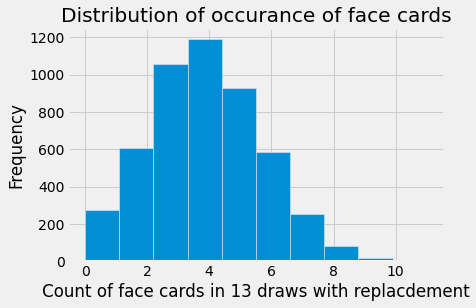

In [12]:
def print_histogram(data, title, xlabel, ylabel):
  plt.hist(data)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

print_histogram(deck_statistics, "Distribution of occurance of face cards", "Count of face cards in 13 draws with replacdement", "Frequency")

**Question 5:** Given your observed value, do you believe that Jade's model is reasonable, or is our alternative more likely? Explain your answer using the distribution drawn in the previous problem. 

Our model is more reasonable as the highest frequencies are with 3 to 5 face card occurance. This gives both parties a very good chance of wining with less bias towards each party. It does not necessarily mean that Jade's model is flawed either as we are given the data of only one run and it is possible to get 8 face cards in one run, however the particular result of Jade's run is very unikely in our model.


## 2. Examining the Therapeutic Touch

### What is the Therapeutic Touch

The Therapeutic Touch (TT) is the idea that everyone can feel the Human Energy Field (HEF) around individuals.  Those who practice TT have described different people's HEFs as "warm as Jell-O" and "tactile as taffy." 

TT was a popular technique used throughout the 20th century that was toted as a great way to bring balance to a person's health. Certain practitioners claim they have the ability to feel the HEF and can massage it in order to promote health and relaxation in individuals.

### Emily Rosa

[Emily Rosa](https://en.wikipedia.org/wiki/Emily_Rosa) was a 4th grade student who was very familiar with the world of TT, thanks to her parents, who were both medical practitioners and skeptics of TT.

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. She later went on to p

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and ask them to extend their hands through a screen (which they can't see through). Emily would be on the other side and would flip a fair coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to answer which hand Emily put out. If a pracitioner could truly interact with a person's HEF, it would be expected that they answered correctly.

Overall, through 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practicioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**Question 1:** Describe Emily’s model for how likely the TT practitioners are to choose the correct hand. What alternative model is her model meant to discredit? Discuss with students around you to come to a conclusion. Check in with a TA or LA if you are stuck.

Null Hypothesis: The correctness of TT practitioners' choices is  random.

Alternative Hypothesis: The correctness of TT practitioners' choices is not random and they have some special sense or technique to make thee correct choice. 

Emily's  model is the Null Hypothesis which tries to disprove the alternative model.

**Question 2:** Remember that the practitioner got the correct answer 44% (0.44) of the time. According to Emily's model, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

In [13]:
expected_proportion_correct = 0.5 # randomness of the coin flip  done by Emily
expected_proportion_correct

0.5

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 3:** We usually use a statistic to help determine which model the evidence points towards. What is a statistic that we can use to compare outcomes under Emily’s model to what was observed? Assign `valid_stat` to an array of integer(s) representing test statistics that Emily can use: 

1. The difference between the expected percent correct and the actual percent correct
2. The absolute difference between the expected percent correct and the actual percent correct
3. The sum of the expected percent correct and the actual percent correct


In [14]:
valid_stat = 1
valid_stat

1

**Question 4:** Why is the statistic from Question 3 the best choice for comparing outcomes in Emily's experiment? How does it relate to the models you defined in question 1?

It is better because we are testing the hypothesis and the best model will always give a result that is closer to our hypothesis.
And if the  actual percent correct is more than the expected percent correct, it is different than when expected precent correct is more than the actual perceent correct. Therfore, we  do not use the absolute difference.

**Question 5:** Define the function `statistic` which takes in an expected proportion and an actual proportion, and returns the value of the statistic chosen in Question 3. Assume that the argument takes in proportions, but  return your answer as a percentage. 

*Hint:* Remember we are asking for a **percentage**, not a proportion. 

In [15]:
def statistic(expected_prop, actual_prop):
  return 100 * (expected_prop - actual_prop) 


**Question 6:** Use your newly defined function to calculate the observed statistic from Emily's experiment. 

In [16]:
observed_statistic = statistic(expected_proportion_correct, 0.44) 
observed_statistic

6.0

**Is this observed statistic consistent with what we might see under Emily’s model?**

In order to answer this question, we must simulate the experiment as though Emily's model was correct, and calculate our statistic for every simulation.

### `sample_proportions`

`sample_proportions` is a function in the **datascience** package. It can be used to randomly sample from multiple categories when you know the proportion of data points that are expected to fall in each category. `sample_proportions` takes two arguments: the sample size and an array that contains the distribution of categories in the population (should sum to 1).

Consider flipping a fair coin, where the two outcomes (coin lands heads and coin lands tails) occur with an equal chance. We expect that half of all coin flips will land heads, and half of all coin flips will land tails.

Run the following cell to see the simulation of 10 flips of a fair coin. Let the first item of `coin_proportions` be the proportion of heads and the second item of `coin_proportions` be the proportion of tails.

In [18]:
coin_proportions = [0.5,0.5]
ten_flips = sample_proportions(10, coin_proportions)
#ten_flips

`sample_proportions` returns an array that is the same length as the proportion array that is passed through. It contains the proportion of each category that appears in the sample. 

In our example, the first item of `ten_flips` is the simulated proportion of heads and the second item of `ten_flips` is the simulated proportion of tails.

In [19]:
simluated_proportion_heads = ten_flips[0]
simluated_proportion_tails = ten_flips[1]

print("In our simluation, " + str(simluated_proportion_heads) + " of flips were heads and " \
     + str(simluated_proportion_tails) + " of flips were tails.")

In our simluation, 0.5 of flips were heads and 0.5 of flips were tails.


**Question 7:** To begin simulating, we should start by creating a representation of Emily's model to use for our simulation. This will be an array with two items in it. The first item should be the proportion of times, assuming that Emily’s model was correct, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practitioner picks the incorrect hand. Assign `model_proportions` to this array. 

After this, we can simulate 210 hand choices, as Emily evaluated in real life, and find a single statistic to summarize this instance of the simulation. Use the `sample_proportions` function and assign the proportion of correct hand choices (out of 210) to `simulation_proportion_correct`. Lastly, use your statistic function to assign `one_statistic`  to the value of the statistic for this one simulation.

In [20]:
model_proportions = [0.5, 0.5] 
sample_size = 210
simulation_proportion_correct = sample_proportions(sample_size, model_proportions)
one_statistic = statistic(simulation_proportion_correct.item(0), simulation_proportion_correct.item(1)) 
one_statistic

4.761904761904767

**Question 8:** Let's now see what the distribution of statistics is actually like under Emily's model. 

Define the function `simulation_and_statistic` to take in the `model_proportions` array and the expected proportion of times a TT practitioner would guess a hand correctly under Emily's model. The function should simulate Emily running through the experiment 210 times and return the statistic of this one simulation. 

*Hint:* This should follow the same pattern as the code you did in the previous problem.  

In [21]:
def simulation_and_statistic(model_proportions, expected_proportion_correct):
    '''Simulates 210 TT hand choices under Emily’s model. 
    Returns one statistic from the simulation.'''
    
    simulation_proportion_correct = sample_proportions(210, model_proportions)
    return statistic(simulation_proportion_correct.item(0), simulation_proportion_correct.item(1)) 
  
one_simulation_stat = simulation_and_statistic(model_proportions, expected_proportion_correct)
print(one_simulation_stat)

5.714285714285716


Using this function, assign `simulated_statistics` to an array of 1000 statistics that you calculated under the assumption that Emily's model was true.

In [22]:
num_repetitions = 1000

simulated_statistics = [] 

for i in range(num_repetitions):
  simulated_statistics.append(simulation_and_statistic(model_proportions, expected_proportion_correct))
  
print(simulated_statistics) 

[4.761904761904767, -0.952380952380949, 0.0, 0.952380952380949, -16.190476190476193, 0.952380952380949, -17.142857142857142, 2.8571428571428523, -2.8571428571428523, 0.952380952380949, 3.809523809523813, -0.952380952380949, -5.714285714285716, -6.666666666666665, 0.0, 5.714285714285716, -7.619047619047614, 2.8571428571428523, -8.57142857142857, -5.714285714285716, -5.714285714285716, -6.666666666666665, 3.809523809523813, 4.761904761904767, -10.476190476190478, -0.952380952380949, 5.714285714285716, 5.714285714285716, 2.8571428571428523, -7.619047619047614, -7.619047619047614, 0.952380952380949, -3.809523809523813, -4.761904761904767, 14.285714285714285, 7.619047619047614, 0.0, 5.714285714285716, 0.0, 8.57142857142857, 3.809523809523813, -7.619047619047614, -5.714285714285716, 5.714285714285716, -4.761904761904767, -17.142857142857142, 10.476190476190478, 6.666666666666665, 0.0, -4.761904761904767, 1.9047619047619035, 11.428571428571432, -0.952380952380949, -5.714285714285716, 2.857142

**Question 9:** Create a percent distribution histogram of your `simulated_statistics`. Be sure to label all parts of your plot.

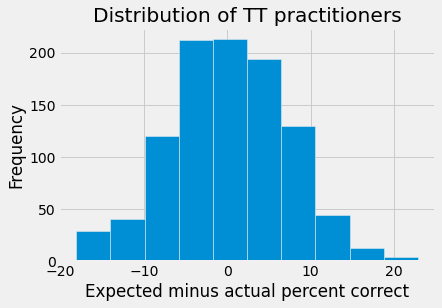

In [24]:
print_histogram(simulated_statistics, "Distribution of TT practitioners", "Expected minus actual percent correct", "Frequency")

We can make a visual argument as to whether we believe the observed statistic is consistent with Emily’s model. Here, since larger values of the test statistic suggest the alternative model (where the chance of guessing the correct hand is something other than 50%), we can formalize our analysis by finding what proportion of simulated statistics were as large or larger than our observed test statistic (the area at or to the right of the observed test statistic). If this area is small enough, we’ll declare that the observed data are inconsistent with our simulated model.

**Question 10:** Calculate the proportion of simulated statistics greater than or equal to the observed statistic. 


In [27]:
observed_expected_minus_actual  = 50 - 44
print(observed_expected_minus_actual)

proportion_greater_or_equal = (4*130 + 5*45 + 10*5) / (10*220 + 5*190 + 5*130 + 5*45 + 10*5 + 5*120 + 5*40 + 5*25)
proportion_greater_or_equal

6


0.159

By convention, we often compare the proportion we just calculated to 0.05. If the proportion of simulated statistics greater than or equal to the observed statistic is sufficiently small (less than or equal to 0.05), then this is evidence against Emily's model. Otherwise, we don’t have any reason to doubt Emily’s model.

This should help you make your own conclusions about Emily Rosa's experiment.

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

Think to yourself about the following questions:

1. Is the data more consistent with Emily' model (practioners were randomly guessing)?
2. What does this mean in terms of Emily's experiment? Do the TT practitioners' answers follow an even chance model or is there something else at play? 

1) Yes, the  data is consistent with Emily's model which means that the practitioners were randomly gussing. This comes from the proportion 0.159 being more than the accepted 0.05  proportion in the histogram when we calculate the area towards the right of previously obsereved correctness of the TT professional.

2) TT Practitioners will always try to prove their practise valid but that is lead by their self interest, however Emily's experiment is driven with data and she has tried to reduce her personal bias with randomizing the hand she gives by flipping a coin for it. Therfore, I think Emily's experiment holds a better significance than the answers by practitioners.